# Auditory Sound Processing - Part III: Linear Filters (FIR & IIR)

In [30]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read
from IPython.display import Audio, display
from scipy import signal

There are two groups of linear filters:

* *Finite Impulse Response (FIR)*-filters
* *Infinite Impulse Response (IIR)*-filters

## Sample data

We will use the following data to demonstrate the effect of linear filters on these input data:

### Noisy Sine

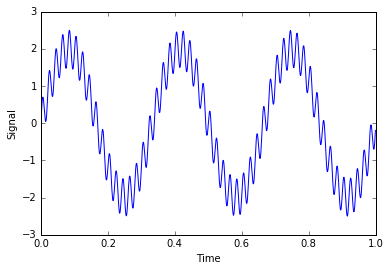

In [31]:
rate = 1000
t = np.arange(0,1,1/rate)
freqs = [3, 50]
amps = [2, 0.5]
x = np.zeros(t.shape)
for freq, amp in zip(freqs,amps):
    x += amp * np.sin(2*np.pi*freq*t)
    
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Signal')

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    Amplitudes = [2, 0.5];
    Frequencies = [3, 50]';
    Time = 0:1/rate:1;

    summed = Amplitudes * sin(2*pi*Frequencies*Time);


### Impulse

(-0.05, 1.05)

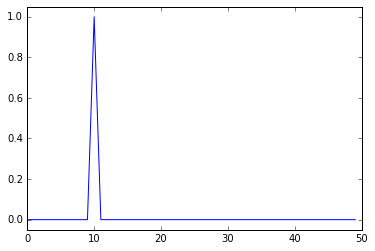

In [32]:
impulse = np.zeros(50)
impulse[10] = 1

plt.plot(impulse)
plt.ylim(-0.05, 1.05)

## Finite Impulse Response-Filters (FIR)

FIR-filters are essentially weighted moving-average filters:

<img src='data/images/MovingFilter.jpg', width=500>

Note the following aspects of FIR-filters:

* the input *feeds forward* to the output (i.e. there is no feedback)
* compared to the input, the output is delayed
* an *impulse* in the input (i.e. an input where $x_i=1$, and all other x's are 0) has only a finite effect on the output.

FIR-filters are amazingly versatile, and can be used to smooth and differentiate data. For example, if you have not yet come in contact with *Savitzky-Golay*-filters, check them out: it is may favorite filter, and can be used to simultaneously smooth the data, and calculate an arbitrary derivative.

### Example 1: Moving Average

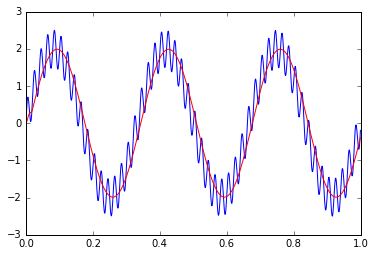

In [33]:
a = 1              # for FIR-filters, "a" is always "1"
b = np.ones(20)/20    # the weight-coefficients
y = signal.lfilter(b,a,x) # apply the filter to the input

plt.plot(t,x)
plt.plot(t,y,'r')

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    y = filter(b,a,x)

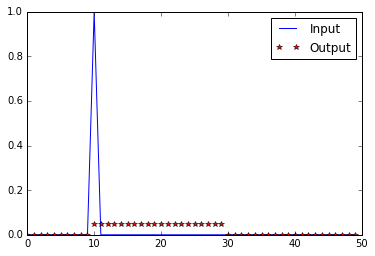

In [34]:
impFiltered = signal.lfilter(b,a, impulse)
plt.plot(impulse)
plt.plot(impFiltered, 'r*')
plt.legend(['Input', 'Output'])

## Infinite Impulse Response-Filters (IIR)

In contrast to FIR-filters, IIR-filters can also include a *feedback* from the output to the input:

<img src='data/images/IIR_filter.jpg', width=500>

### Example 1: Impulse-Filtering

As the name implies, an impulse input to an IIR-filter can have an arbitrarily long effect on the output. For example, take the filter:

\begin{equation}
    y_i = \frac{y_{i-1}}{2}
\end{equation}

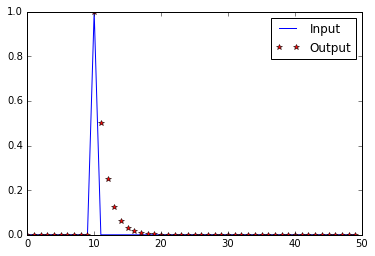

In [35]:
a = [1, -0.5]
b = [1]
impFiltered = signal.lfilter(b,a,impulse)

plt.plot(impulse)
plt.plot(impFiltered,'*r')
plt.legend(['Input', 'Output'])

### Example 2:  Lowpass

A filter-type frequently used for bandpass-filtering are *Butterworth* filters.

First, we demonstrate a low-pass filter:

In [36]:
# Filter coefficients
from scipy import signal
Nyq = rate/2
cutoff = 10
b,a = signal.butter(4, cutoff/Nyq)
print(a)
print(b)

[ 1.         -3.83582554  5.52081914 -3.53353522  0.848556  ]
[  8.98486146e-07   3.59394459e-06   5.39091688e-06   3.59394459e-06
   8.98486146e-07]


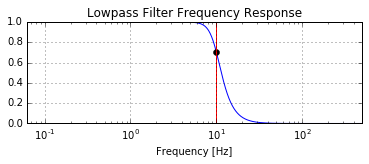

In [37]:
# Plot the frequency response.
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*rate*w/np.pi, np.abs(h), 'b')
plt.semilogx(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='r')
plt.xlim(0, 0.5*rate)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

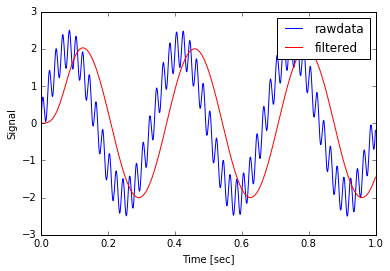

In [38]:
# Apply the filter to the noisy data
filtered = signal.lfilter(b,a,x)

plt.plot(t,x, label='rawdata')
plt.hold(True)
plt.plot(t,filtered, 'r', label='filtered')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

### Example 3: "filtfilt" - Lowpass, without delay

As you can see in the example above, *lfilter* induces a delay. For offline data analysis, this can be eliminated, by filtering the data twice: once forward, and once backward. This eliminates the delay, *but doubles the order of the filter*!

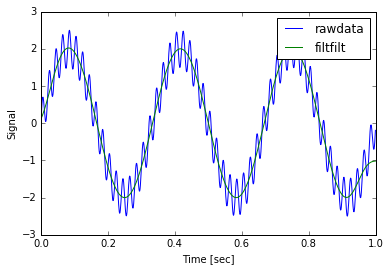

In [39]:
ffiltered = signal.filtfilt(b,a,x)

plt.plot(t,x, label='rawdata')
plt.hold(True)
plt.plot(t,ffiltered, 'g', label='filtfilt')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

### Example 4: Bandpass

Our sample signal consists of two different frequencies. A bandpass, which contains only the upper frequency, should eliminate the lower frequency:

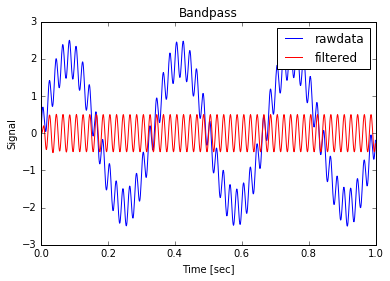

In [40]:
b,a = signal.butter(4, np.r_[20,100]/Nyq, 'bandpass')
filtered = signal.lfilter(b,a,x)

plt.plot(t,x, label='rawdata')
plt.hold(True)
plt.plot(t,filtered, 'r', label='filtered')
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('Bandpass')
plt.legend()

### Example 4: Gammatone Filters

Technically, a gammatone filter is a linear filter described by an impulse response that is the product of a gamma distribution and sinusoidal tone. 

<img src='https://upload.wikimedia.org/wikipedia/en/9/94/Sample_gammatone.svg', width=400>

With suitable coefficients, a gammatone filter simluates the movement of one location of the basilar membrane, which is elicited by a given sound-input. It is therefore a widely used model of auditory filters in the auditory system.

<img src="data/images/Backward.png", align='left'> [Soundproc_2_TimeDependence](Soundproc_2_TimeDependence.ipynb)

    Author: Thomas Haslwanter
    Date: March 13, 2016
    Ver: 1.1

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.